## 0. Import Packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
from datetime import datetime

## 1. Import and Merge Data

In [26]:
male = pd.read_csv('./data/MA_Exer_PikesPeak_Males.txt', encoding='latin-1', delimiter='\t')
female = pd.read_csv('./data/MA_Exer_PikesPeak_Females.txt', encoding='latin-1', delimiter='\t')

In [27]:
# Merging to prevent repetition
male['is_male'] = 1
female['is_male'] = 0
df_m = pd.concat([male, female])

## 2. Data Cleaning

### 2.1 Column Renaming

In [28]:
# Renaming columns for data cleaning
df_m = df_m.rename(columns={
    # The order in which each racer finished relative to racers of the same gender
    'Place' : 'place',
    # A division comprises racers of the same gender and age group* / The total number of racers within the same division
    'Div/Tot' : 'div_tot',
    # Racer’s bib number
    'Num' : 'bib_num',
    # Name of racer
    'Name' : 'name',
    # Age of the racer
    'Ag' : 'age',
    # Hometown of racer
    'Hometown' : 'hometown',
    # Elapsed time from the formal start of the race and when the racer crossed the finish line
    'Gun Tim' : 'gun_time',
    # Elapsed time from when the racer crossed the starting line and when the racer crossed the finish line
    'Net Tim' : 'net_time',
    # Racer's average time per mile during the race
    'Pace' : 'avg_time_per_mile'
})

### 2.2 High-Level Data View

In [29]:
df_m.head(20)

,place,div_tot,bib_num,name,age,hometown,gun_time,net_time,avg_time_per_mile,is_male
0,1,1/48,9,Joshua Kemei,22.0,Kenya .,28:48,28:47#,4:38,1
1,2,2/48,35,George Kirwa Misoi,22.0,Kenya .,29:11,29:10#,4:42,1
2,3,3/48,3,Jacob Frey,24.0,Oakton VA,29:38,29:37#,4:46,1
3,4,1/96,49,Gurmessa Kumsa,27.0,Oxon Hill MD,29:46,29:46#,4:48,1
4,5,4/48,31,Mike Baird,24.0,Ardmore PA,30:31,30:30,4:55,1
5,6,5/48,1662,Jon Lauder,23.0,Oakton VA,31:14,31:13,5:02,1
6,7,1/143,11,Paul Rades,33.0,Wheaton MD,31:40,31:38,5:06,1
7,8,6/48,48,Haile Gelalcha,20.0,Oxon Hill MD,31:39,31:39,5:06,1
8,9,2/96,33,John Bitok,26.0,Kenya .,31:55,31:55,5:09,1
9,10,1/45,50,Dema Woyessa,19.0,Oxon Hill MD,32:30,32:30*,5:14,1


In [30]:
df_m.tail(20)

,place,div_tot,bib_num,name,age,hometown,gun_time,net_time,avg_time_per_mile,is_male
1085,1086,75/76,1329,Linda Hanson,54.0,Gaithersburg MD,1:28:41,1:23:23,13:26,0
1086,1087,239/247,1886,Sheila Mckinney,39.0,Washington DC,1:34:54,1:26:10,13:52,0
1087,1088,109/110,2362,Janelle Sandford,48.0,Woodbine MD,1:31:25,1:26:11,13:53,0
1088,1089,240/247,1912,Alyce Menton,37.0,Germantown MD,1:31:25,1:26:18,13:54,0
1089,1090,86/86,1252,Melanie Gomez,21.0,Silver Spring M,D 1:27:38,1:26:30,13:56,0
1090,1091,241/247,943,Leyla Diaz,36.0,Silver Spring M,D 1:37:00,1:31:39,14:45,0
1091,1092,169/173,1451,Lisa Jackson,32.0,Rockville MD,1:33:04,1:31:56,14:48,0
1092,1093,242/247,1855,Carla Mccaffrey,39.0,Rockville MD,1:37:45,1:32:30,14:54,0
1093,1094,243/247,3034,Dayna Cavanaugh,37.0,Gaithersburg MD,1:37:45,1:32:30,14:54,0
1094,1095,76/76,2427,Lesley Shear,53.0,Boyds MD,1:38:01,1:32:57,14:58,0


In [31]:
df_m.isnull().sum()

place                0
div_tot              4
bib_num              0
name                 0
age                  2
hometown             0
gun_time             0
net_time             0
avg_time_per_mile    0
is_male              0
dtype: int64

In [32]:
df_m.dtypes

place                  int64
div_tot               object
bib_num                int64
name                  object
age                  float64
hometown              object
gun_time              object
net_time              object
avg_time_per_mile     object
is_male                int64
dtype: object

### Columns most needed for exploratory data analysis (EDA) as a result of exercise questions:
- 'place'
- 'div_tot'
- 'name'
- 'gun_time'
- 'net_time'
- 'is_male'

Waiting until the end of the data cleaning process to remove columns that are not needed in case they are needed for imputation for other features.

### Insights for data cleaning:
- Male and Female datasets are sorted by 'place' column and 'place' likely has few or no input issues.
- div_tot has 4 nulls, which we can likely impute manually with the information from similar runners.
- I will need to create a helper function that takes in age and gender to ensure the accuracy of div_tot
- 'place', 'bib_num', and 'name' are unlikely to have errors.
- 'age' has some nulls and likely has errors as a result of the column items being identified as float64. This column, however, will not need to be used to answer the exercise questions, so the nulls in 'age' and 'div_tot' are irrelevant and do not need to be fixed.
- Based on the exercise questions, it seems that hometown is a column that we can remove. However, there are data input issues as a result of the hometown column that are affecting the 'gun_time' column.
- There are many input issues in the 'net_time' column that need to be addressed.
- Not sure if there are input issues in 'avg_time_per_mile' or not, but the column elements are objects and that may need to be changed.
- Index is equal to 'place' value minus 1.

### 2.3 Index reset

In [33]:
df_m = df_m.reset_index().drop(columns=['index'])

### 2.4 Cleaning div

Steps in this process:
1. Identify inaccuracies in div column and handle them appropriately

In [39]:
df_m[['div', 'tot']] = df_m['div_tot'].str.split('/', expand=True)
df_m.head()

,place,div_tot,bib_num,name,age,hometown,gun_time,net_time,avg_time_per_mile,is_male,div,tot
0,1,1/48,9,Joshua Kemei,22,Kenya .,28:48,28:47#,4:38,1,1,48
1,2,2/48,35,George Kirwa Misoi,22,Kenya .,29:11,29:10#,4:42,1,2,48
2,3,3/48,3,Jacob Frey,24,Oakton VA,29:38,29:37#,4:46,1,3,48
3,4,1/96,49,Gurmessa Kumsa,27,Oxon Hill MD,29:46,29:46#,4:48,1,1,96
4,5,4/48,31,Mike Baird,24,Ardmore PA,30:31,30:30,4:55,1,4,48


Age groups include:
- 0-14
- 15-19
- 20-29
- 30-39
- 40-49
- 50-59
- 60-69
- 70-79
- 80-89 (max age is 84)

Grouped by gender, we should be able to categorize runners in the right divisions.

In [40]:
# Manually categorizing these runners as the age intervals for these two divisions are different from the rest.
df_m.loc[(df_m['age'] <= 14) & (df_m['is_male'] == 1), ['div']] = 1
df_m.loc[(df_m['age'] <= 14) & (df_m['is_male'] == 0), ['div']] = 2

df_m.loc[(df_m['age'] >= 15) & (df_m['age'] <= 19) & (df_m['is_male'] == 1), ['div']] = 3
df_m.loc[(df_m['age'] >= 15) & (df_m['age'] <= 19) & (df_m['is_male'] == 0), ['div']] = 4

In [41]:
def fix_div_cols(df):
    """Returns a DataFrame where the division column is cleaned based on age and gender values."""
    
    # Initialize values
    x = 20
    y = 29
    i = 5
    j = 6

    # Iterate in age intervals of 10
    while x <= 80:
        df.loc[(df_m['age'] >= x) & (df_m['age'] <= y) & (df_m['is_male'] == 1), ['div']] = i
        df.loc[(df_m['age'] >= x) & (df_m['age'] <= y) & (df_m['is_male'] == 0), ['div']] = j

        # Changing values for next iteration
        x += 10
        y += 10
        i += 2
        j += 2

    return df

In [42]:
# Before
df_m[['div']].head()

,div
0,1
1,2
2,3
3,1
4,4


In [43]:
# No need to reassign to df_m variable as .loc overwrites
fix_div_cols(df_m)
# After
df_m[['div']].head()

,div
0,5
1,5
2,5
3,5
4,5


### 2.5 Cleaning time columns

Steps in this process:
1. Identify and remove substrings preventing time-related columns from being converted to time (such as special characters or letters)
2. Adjust time format within columns for conversion. String to time conversion will not work or is very difficult to convert on a column if there are different formats within that respective column.
3. Convert time values to seconds - calculations in our exploratory analysis won't work on time values and will only work on numerics.

### 2.5.1 gun_time

In [44]:
# Creating a futonction that will return a set of string values  identify commonalities in incorrect values to identify a strategy to correct these values
def get_non_dt_vals(vals):
  """Returns a set of string values that are supposed to be time to understand which values are making a column act as objects"""
  non_dt = set()

  for val in vals:

    try:
      datetime.strptime(val, '%H:%M:%S')
    except ValueError:
        try:
          datetime.strptime(val, '%M:%S')
        except ValueError:
          non_dt.add(val)

  return non_dt

In [45]:
gun_time_non_dt = get_non_dt_vals(df_m['gun_time'])

The common problem with all of the values in the gun_time column is that a letter is carrying over from the hometown column. Since the hometown column isn't something that we need for the exercise questions, we can remove the letters from the gun_time column.

In [46]:
def remove_dirty_substrings_guntime(val):
    """Returns a value with removed left-end substrings that prevent a value from being converted to time."""
    if val in gun_time_non_dt: # Using a set variable instead of the get_non_dt_vals function for time complexity
        return val[1:].strip()
    return val

In [47]:
# Before
df_m[['gun_time']].tail()

,gun_time
2365,1:43:47
2366,1:50:31
2367,D 1:50:31
2368,1:46:49
2369,1:46:49


In [48]:
df_m['gun_time'] = df_m['gun_time'].transform(remove_dirty_substrings_guntime)
# After
df_m[['gun_time']].tail()

,gun_time
2365,1:43:47
2366,1:50:31
2367,1:50:31
2368,1:46:49
2369,1:46:49


### 2.5.2 net_time

Since net_time values have special characters on the ends of their strings, we will need to rewrite the remove_dirty_substrings_guntime function to remove the substrings on the right sides of these strings.

In [49]:
non_dt_nettime = get_non_dt_vals(df_m['net_time'])

In [50]:
def remove_dirty_substrings_nettime(val):
    """Returns a value with removed left-end substrings that prevent a value from being converted to datetime."""
    if val in non_dt_nettime:
        return val[:-1].strip()
    return val

In [51]:
# Before
df_m[['net_time']].head()

,net_time
0,28:47#
1,29:10#
2,29:37#
3,29:46#
4,30:30


In [52]:
df_m['net_time'] = df_m['net_time'].transform(remove_dirty_substrings_nettime)
# After
df_m[['net_time']].head()

,net_time
0,28:47
1,29:10
2,29:37
3,29:46
4,30:30


In [53]:
df_m[['gun_time','net_time']]

,gun_time,net_time
0,28:48,28:47
1,29:11,29:10
2,29:38,29:37
3,29:46,29:46
4,30:31,30:30
...,...,...
2365,1:43:47,1:40:39
2366,1:50:31,1:45:22
2367,1:50:31,1:45:22
2368,1:46:49,1:46:49


### 2.6 Converting time columns to seconds

In [54]:
# The creation of this function is for the gun_time and net_time columns.
def dt_adjust(val):
    """Returns a value that will force a user input value to have the same consistent %H:%M:%S format.
    Dependent on the amount of colons in the value."""

    count = 0
    
    for char in list(val):
        if char == ':':
            count +=1

    if count == 1:
        return '00:' + val

    if count == 2:
        return '0' + val

In [55]:
# Before
df_m[['gun_time','net_time']].head()

,gun_time,net_time
0,28:48,28:47
1,29:11,29:10
2,29:38,29:37
3,29:46,29:46
4,30:31,30:30


In [56]:
df_m['gun_time'] = df_m['gun_time'].transform(dt_adjust)
df_m['net_time'] = df_m['net_time'].transform(dt_adjust)
# After
df_m[['gun_time','net_time']].head()

,gun_time,net_time
0,00:28:48,00:28:47
1,00:29:11,00:29:10
2,00:29:38,00:29:37
3,00:29:46,00:29:46
4,00:30:31,00:30:30


In [57]:
def seconds_conversion_HMS(val):
    """Returns seconds as a result of converting a %H:%M:%S formatted time string."""

    val = datetime.strptime(val, '%H:%M:%S')
    return val.second + val.minute * 60 + val.hour * 3600

In [58]:
# Before
df_m[['gun_time','net_time']].head()

,gun_time,net_time
0,00:28:48,00:28:47
1,00:29:11,00:29:10
2,00:29:38,00:29:37
3,00:29:46,00:29:46
4,00:30:31,00:30:30


In [59]:
df_m['gun_time_sec'] = df_m['gun_time'].apply(seconds_conversion_HMS)
df_m['net_time_sec'] = df_m['net_time'].apply(seconds_conversion_HMS)

# After
df_m[['gun_time','net_time']].head()

,gun_time,net_time
0,00:28:48,00:28:47
1,00:29:11,00:29:10
2,00:29:38,00:29:37
3,00:29:46,00:29:46
4,00:30:31,00:30:30


In [91]:
# Create cleaned DataFrame to perform exploratory analysis
df = df_m[['place','div','name','gun_time_sec','net_time_sec','is_male']].copy()

## 3. Exploratory Data Analysis / Exercise Questions

### 3.0 Creating Interaction Terms

In [99]:
# Planning to examine the difference between gun time and net time and see if it has an effect on other variables in the DataFrame.
df['pre_start_line_time'] = df['gun_time_sec'] - df['net_time_sec']

### 3.1 What are the mean, median, mode, and range of the race results for all racers by gender?

### 3.1.1 Mean

In [62]:
df.groupby('is_male')['net_time_sec'].mean()

is_male
0    3506.768182
1    3127.066614
Name: net_time_sec, dtype: float64

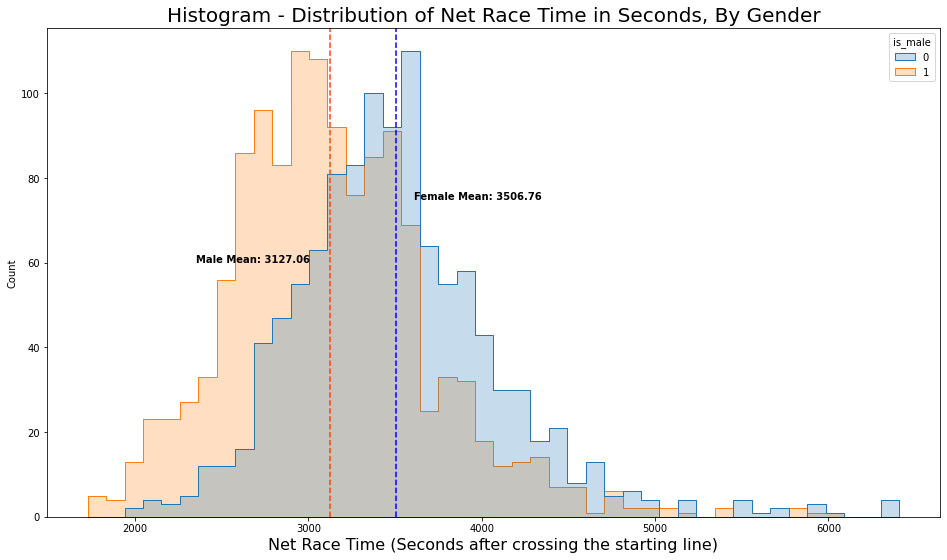

In [63]:
plt.figure(figsize=(16,9))
plt.title('Histogram - Distribution of Net Race Time in Seconds, By Gender', fontsize=20)
plt.xlabel('Net Race Time (Seconds after crossing the starting line)', fontsize=16)

# Female Mean Line
plt.axvline(
    3506.76, 
    c='blue', 
    ls='--')
plt.text(
    3606.76, 
    75,
    'Female Mean: 3506.76',
    weight='bold')

# Male Mean Line
plt.axvline(
    3127.06, 
    c='orangered', 
    ls='--')
plt.text(
    2350, 
    60,
    'Male Mean: 3127.06',
    weight='bold')

sns.histplot(df, x='net_time_sec', hue='is_male', element='step', kde=False);

Women averaged approximately 6.6 minutes or 400 seconds longer than men to finish the race.

### 3.1.2 Median

In [64]:
df.groupby('is_male')['net_time_sec'].median()

is_male
0    3469.0
1    3082.0
Name: net_time_sec, dtype: float64

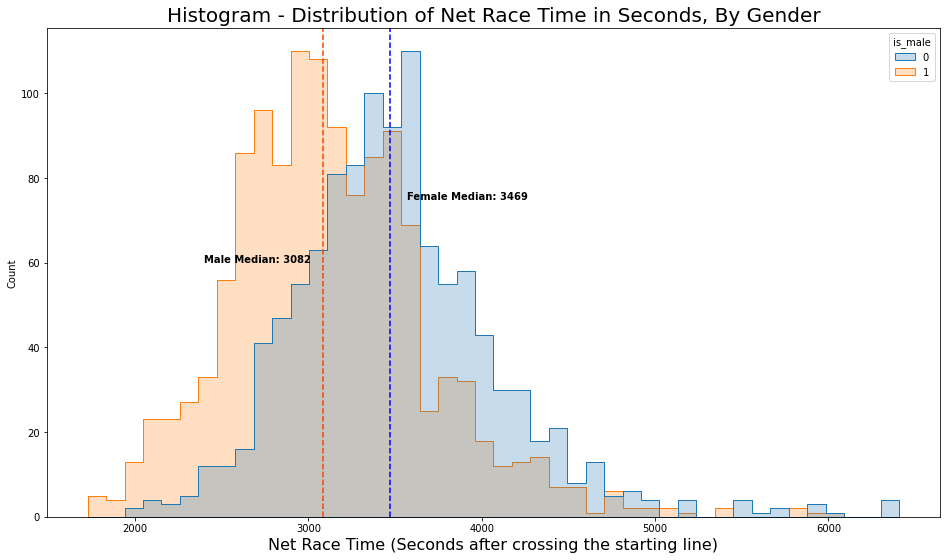

In [65]:
plt.figure(figsize=(16,9))
plt.title('Histogram - Distribution of Net Race Time in Seconds, By Gender', fontsize=20)
plt.xlabel('Net Race Time (Seconds after crossing the starting line)', fontsize=16)

# Female Median Line
plt.axvline(
    3469, 
    c='blue', 
    ls='--')
plt.text(
    3569, 
    75,
    'Female Median: 3469',
    weight='bold')

# Male Median Line
plt.axvline(
    3082, 
    c='orangered', 
    ls='--')
plt.text(
    2400, 
    60,
    'Male Median: 3082',
    weight='bold')

sns.histplot(df, x='net_time_sec', hue='is_male', element='step');

The median/midpoint of the race grouped by gender differs by approximately 400 seconds, with women being slower than men.

### 3.1.3 Range

In [66]:
fem_max = df.groupby('is_male')['net_time_sec'].max()[0]
fem_min = df.groupby('is_male')['net_time_sec'].min()[0]
male_max = df.groupby('is_male')['net_time_sec'].max()[1]
male_min = df.groupby('is_male')['net_time_sec'].min()[1]

In [67]:
print('Female Range:', fem_max - fem_min)
print('Male Range:', male_max - male_min)

Female Range: 4431
Male Range: 4311


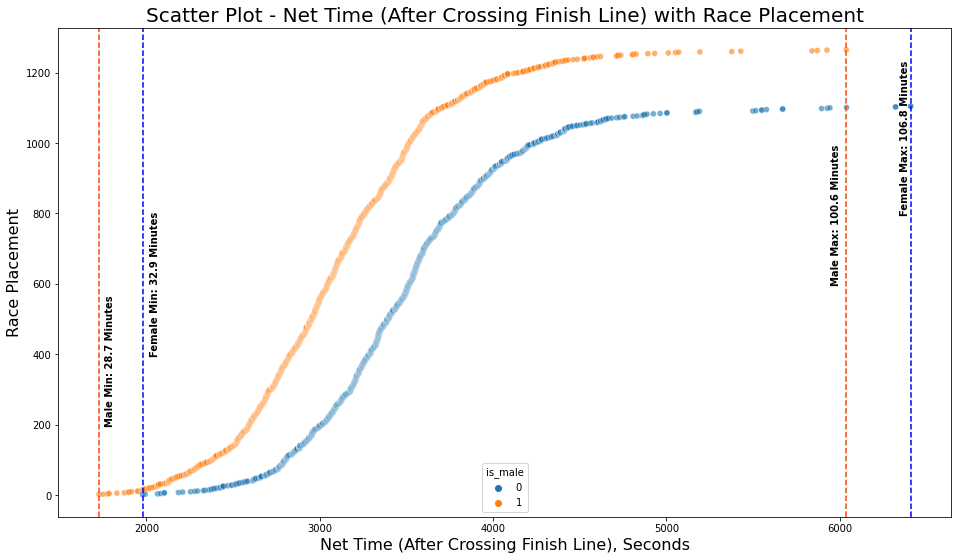

In [68]:
plt.figure(figsize=(16,9))
plt.title('Scatter Plot - Net Time (After Crossing Finish Line) with Race Placement', fontsize=20)
plt.xlabel('Net Time (After Crossing Finish Line), Seconds', fontsize=16)
plt.ylabel('Race Placement', fontsize=16)

# Female Min Line
plt.axvline(
    fem_min, 
    c='blue', 
    ls='--')
plt.text(
    2020, 
    400,
    'Female Min: 32.9 Minutes',
    weight='bold',
    rotation='vertical')

# Male Min Line
plt.axvline(
    male_min, 
    c='orangered', 
    ls='--')
plt.text(
    1760, 
    200,
    'Male Min: 28.7 Minutes',
    weight='bold',
    rotation='vertical')

# Female Max Line
plt.axvline(
    fem_max, 
    c='blue', 
    ls='--')
plt.text(
    6350, 
    800,
    'Female Max: 106.8 Minutes',
    weight='bold',
    rotation='vertical')

# Male Max Line
plt.axvline(
    male_max, 
    c='orangered', 
    ls='--')
plt.text(
    5950, 
    600,
    'Male Max: 100.6 Minutes',
    weight='bold',
    rotation='vertical')

sns.scatterplot(data=df, x='net_time_sec', y='place', hue=df['is_male'], alpha=0.6);

Range is relatively similar, only being 120 seconds or 2 minutes in difference. The race results for men are approximately 120 seconds or 2 minutes less diverse than the race results for the women.

Female placement and male placement are two separate metrics. For example, there is a female first place and a male first place. If men and women were running the same race (in the context of placement) the above scatterplot would be 1 line. Using range, x minimums and x maximums as metrics, this supports our understanding that men were generally faster than women. We also see that after about 4500 seconds or 75 minutes (1 hour 15 minutes), that's where we tend to see much less concentration of runners finishing the race. 

### 3.1.4 Mode

In [69]:
# Slight class imbalance
df['is_male'].value_counts(normalize=True)

1    0.534096
0    0.465904
Name: is_male, dtype: float64

In [70]:
df['net_time_sec'].groupby(df['is_male']).value_counts()[0][:5]

net_time_sec
2886    5
3095    5
3179    5
3209    5
3540    5
Name: net_time_sec, dtype: int64

In [71]:
df['net_time_sec'].groupby(df['is_male']).value_counts()[1][:10]

net_time_sec
2128    4
2825    4
2843    4
2988    4
2998    4
3080    4
3126    4
3162    4
3264    4
3403    4
Name: net_time_sec, dtype: int64

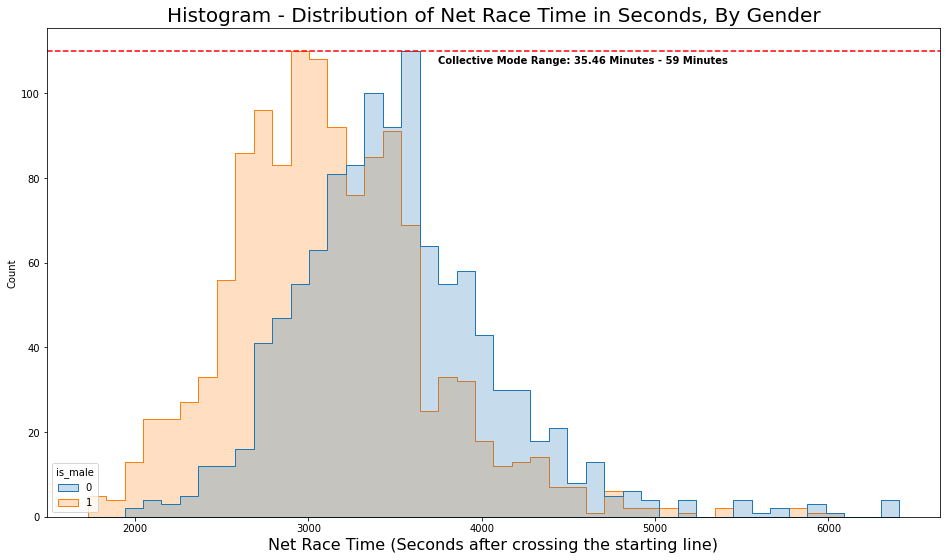

In [72]:
plt.figure(figsize=(16,9))
plt.title('Histogram - Distribution of Net Race Time in Seconds, By Gender', fontsize=20)
plt.xlabel('Net Race Time (Seconds after crossing the starting line)', fontsize=16)

# Collective Mode Line
plt.axhline(
    110, 
    c='red', 
    ls='--')
plt.text(
    3750, 
    107,
    'Collective Mode Range: 35.46 Minutes - 59 Minutes',
    weight='bold')

sns.histplot(df, x='net_time_sec', hue='is_male', element='step');

The largest concentration of runners finished the race between 35 and 59 minutes after crossing the starting line.

The modes (5 racers per net time) for female racetimes include:
- 2886 seconds or 48.1 minutes
- 3095 seconds or 51.58 minutes
- 3179 seconds or 52.98 minutes
- 3209 seconds or 53.48 minutes
- 3540 seconds or 59 minutes

The 10 modes (4 racers per net time) for male racetimes include:
- 2128 seconds or 35.46 minutes
- 2825 seconds or 47.08 minutes
- 2843 seconds or 47.38 minutes
- 2988 seconds or 49.8 minutes
- 2998 seconds or 49.9 minutes
- 3080 seconds or 51.3 minutes
- 3126 seconds or 52.1 minutes
- 3162 seconds or 52.7 minutes
- 3264 seconds or 54.4 minutes
- 3404 seconds or 56.7 minutes

### 3.2 Analyze the difference between gun and net time race results.

Steps in this process:
1. High-level view of gun and net time means, ranges and correlations
2. Examine nuances of data in relation to normal distribution as well as in relation to gun vs. net time distributions
3. Examine gun time, net time, and interaction term (pre_start_line_time) in relation to other variables

In [73]:
print('Gun Time Mean:', df['gun_time_sec'].mean())
print('Net Time Mean:', df['net_time_sec'].mean())
print('Pre-Crossing Starting Line Wait Mean:', df['pre_start_line_time'].mean())

Gun Time Mean: 3474.898771706904
Net Time Mean: 3303.9711986446423
Pre-Crossing Starting Line Wait Mean: 170.92757306226176


The average difference between gun_time and net_time is approximately 171 seconds or 2.85 minutes.

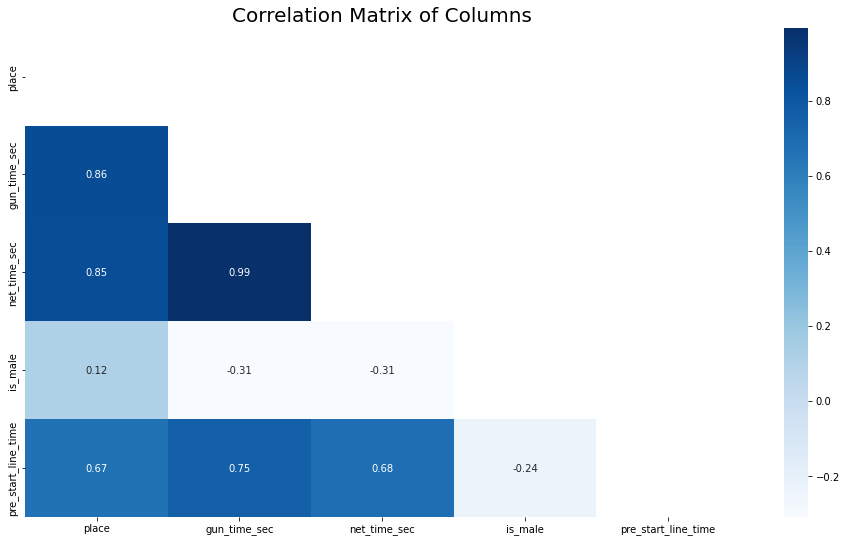

In [74]:
plt.figure(figsize=(16,9))
plt.title('Correlation Matrix of Columns', fontsize=20)
mask = np.triu(np.ones_like(df.corr()))

sns.heatmap(
    df.corr(), 
    annot=True,
    cmap='Blues',
    mask=mask);

There is a 0.99 correlation coefficient (Pearson) between gun time and net time. Makes sense as most of gun time is comprised of net time during the race. The correlations that are the most surprising are the correlations between pre_start_line_time and other variables. This is something that we will need to explore later.

In [75]:
print('Gun Time Range:', (df['gun_time_sec'].min(), df['gun_time_sec'].max()))
print('Net Time Range:', (df['net_time_sec'].min(), df['net_time_sec'].max()))

Gun Time Range: (1728, 6631)
Net Time Range: (1727, 6409)


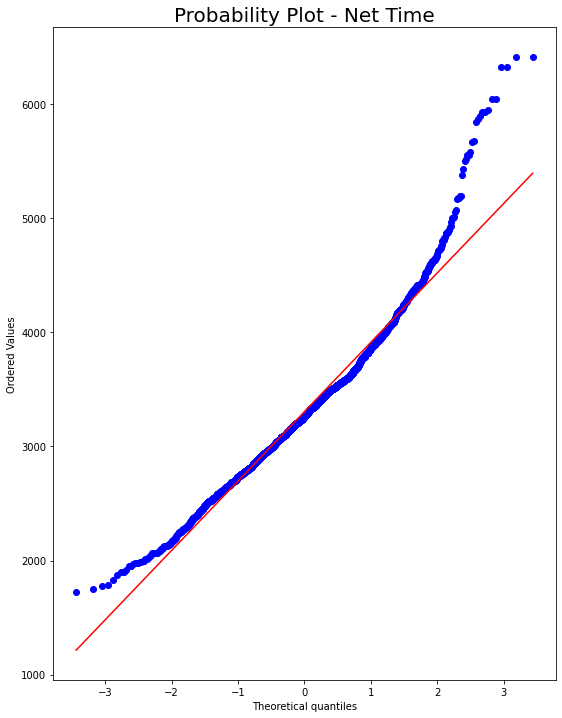

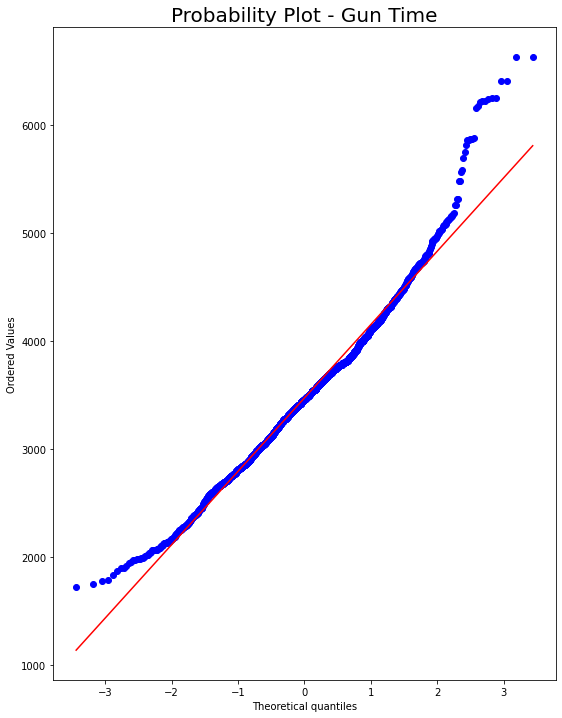

In [76]:
plt.figure(figsize=(9, 12))
stats.probplot(df['net_time_sec'], dist="norm", plot=pylab)
pylab.title('Probability Plot - Net Time', fontsize=20)
pylab.show();

plt.figure(figsize=(9, 12))
stats.probplot(df['gun_time_sec'], dist="norm", plot=pylab)
pylab.title('Probability Plot - Gun Time', fontsize=20)
pylab.show();

With both gun time and net time, we see a visibly evident stray from the normal distribution on the lower and higher ends of the quartiles. This is likely to be the fastest and the slowest runners performing at levels that do not match the rest of the runners in the distribution. These probability plots support the histograms that showed right skewed distributions, pulled by slower runners.

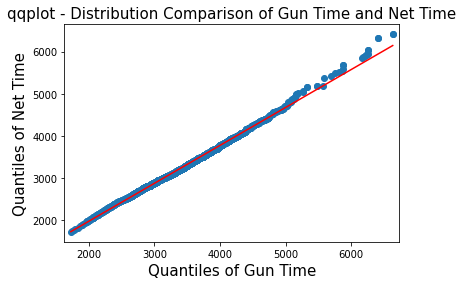

In [77]:
x = df['gun_time_sec']
y = df['net_time_sec']

pp_x = sm.ProbPlot(x)
pp_y = sm.ProbPlot(y)

qqplot_2samples(pp_x, pp_y, line='r')
plt.title('qqplot - Distribution Comparison of Gun Time and Net Time', fontsize=15)
plt.xlabel('Quantiles of Gun Time', fontsize=15)
plt.ylabel('Quantiles of Net Time', fontsize=15)
plt.show()

Based on this comparison qqplot, we see that the distribution for net time strays away from normal distribution on the right end slightly more than the gun time distribution does.

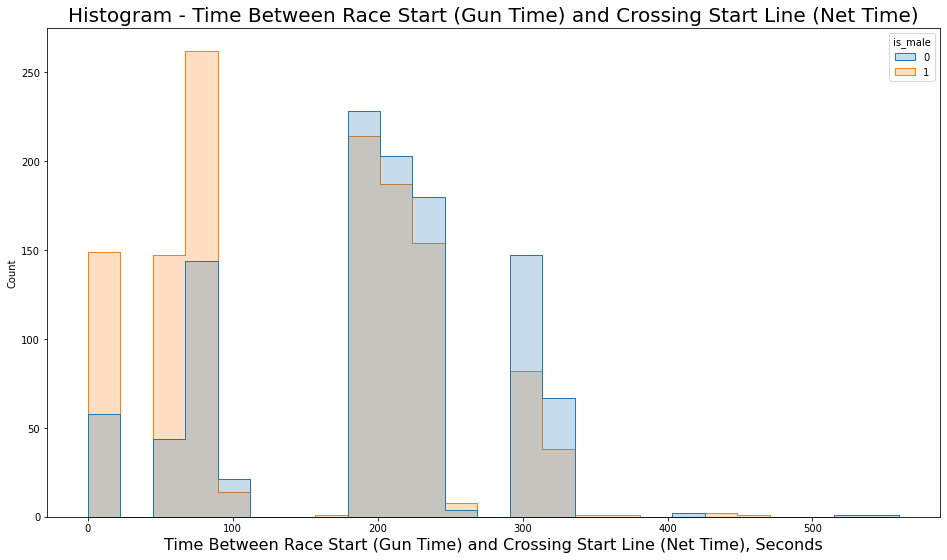

In [78]:
plt.figure(figsize=(16,9))
plt.title('Histogram - Time Between Race Start (Gun Time) and Crossing Start Line (Net Time)', fontsize=20)
plt.xlabel('Time Between Race Start (Gun Time) and Crossing Start Line (Net Time), Seconds', fontsize=16)
sns.histplot(df, x='pre_start_line_time', hue='is_male', element='step');

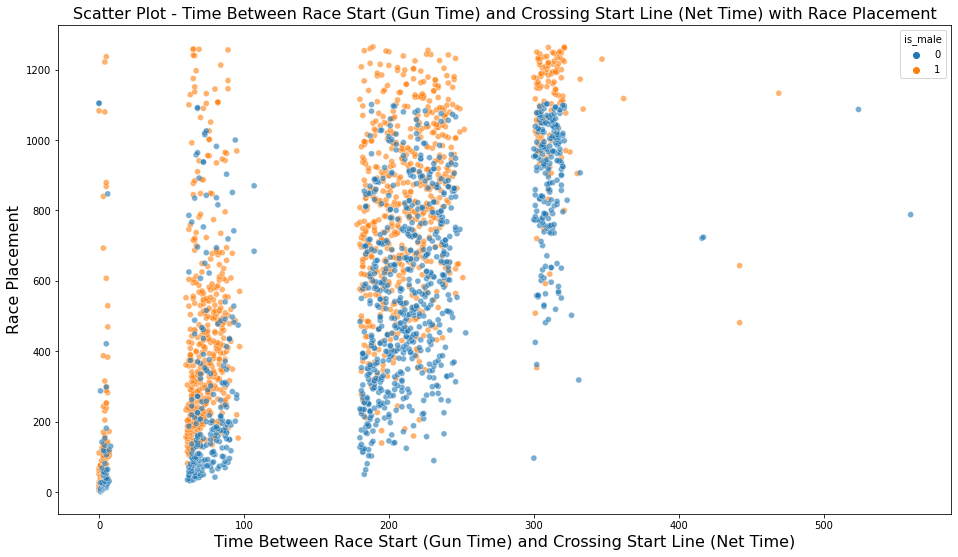

In [79]:
plt.figure(figsize=(16,9))
plt.title('Scatter Plot - Time Between Race Start (Gun Time) and Crossing Start Line (Net Time) with Race Placement', fontsize=16)
plt.xlabel('Time Between Race Start (Gun Time) and Crossing Start Line (Net Time)', fontsize=16)
plt.ylabel('Race Placement', fontsize=16)
sns.scatterplot(data=df, x='pre_start_line_time', y='place', hue=df['is_male'], alpha=0.6);

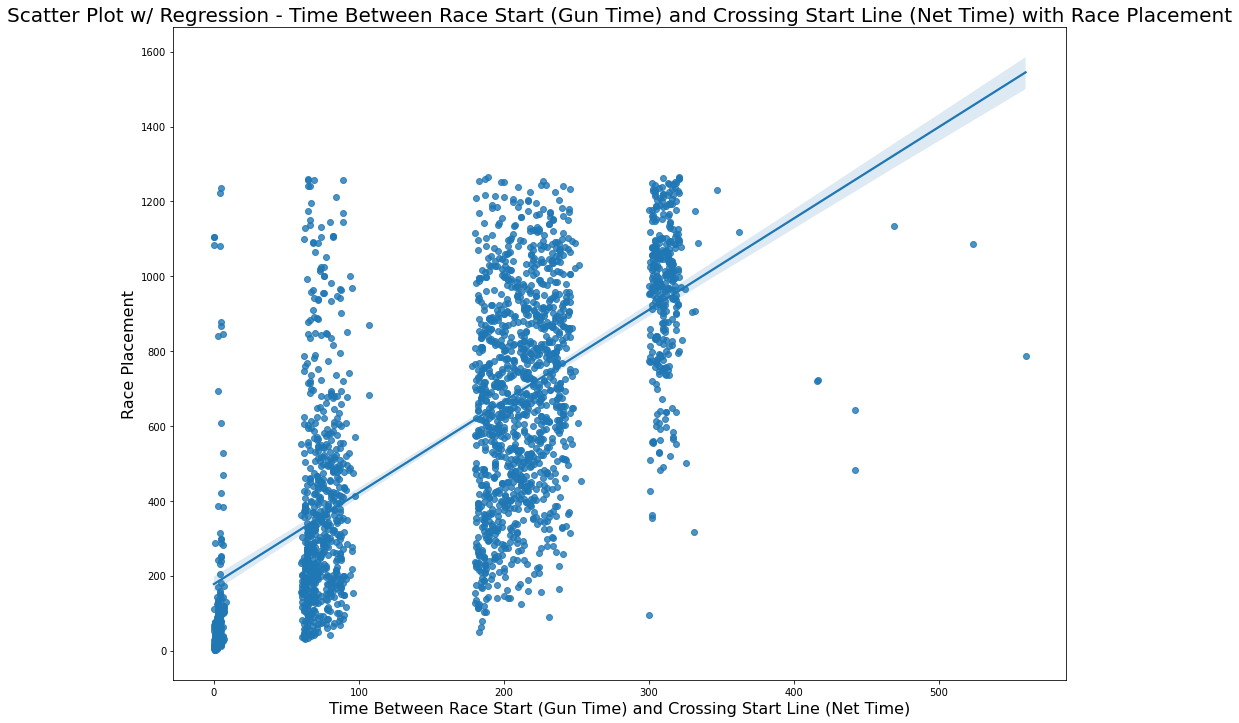

In [80]:
plt.figure(figsize=(16,12))
plt.title('Scatter Plot w/ Regression - Time Between Race Start (Gun Time) and Crossing Start Line (Net Time) with Race Placement', fontsize=20)
p = sns.regplot(data=df, x='pre_start_line_time', y='place')
p.set_xlabel('Time Between Race Start (Gun Time) and Crossing Start Line (Net Time)', fontsize=16)
p.set_ylabel('Race Placement', fontsize=16);

There does seem to be a pattern between the amount of time that it takes from the start of the race to cross the finish line and race placement- it seems that the longer it takes for certain runners to cross the starting line, the lower their chances are of placing well (low, as lower numbers for placements are more desirable). Because of the evident clustering on the visualizations, we can tell that it is likely that runners were allowed to run in batches- only a certain amount of runners were able to or allowed to cross the starting line at certain points in the race. It is likely that the runners who won aren't necesarily the best runners, but they won because they were the best runners **in the first batch of runners allowed to cross the starting line**. Depending on how the clusters of runners are selected, there may be an element of luck in determining whether or not a runner is going to place well in the race.

### 3.3 How much time separates Chris Doe from the top 10 percentile of racers of the same division?

In [81]:
df[df['name'] == 'Chris Doe']

,place,div,name,gun_time_sec,net_time_sec,is_male,pre_start_line_time
534,535,9,Chris Doe,3187,2983,1,204


In [82]:
# Chris Doe's net time in seconds
chris_doe_performance = df[df['name'] == 'Chris Doe']['net_time_sec'].max()
chris_doe_performance

2983

In [83]:
# Slowest running the in the top 10th percentile
same_div_as_chris = df[df['div'] == 9]
tenth_perc_max_time = same_div_as_chris[same_div_as_chris['net_time_sec'] <= same_div_as_chris['net_time_sec'].quantile(.10)]['net_time_sec'].max()
tenth_perc_max_time

2499

In [84]:
# Aggregating the mean of the top 10th percentile
tenth_perc_max_time_mean = same_div_as_chris[same_div_as_chris['net_time_sec'] <= same_div_as_chris['net_time_sec'].quantile(.10)]['net_time_sec'].mean()
tenth_perc_max_time_mean

2288.0238095238096

In [85]:
# Time that Chris Doe needed to reach the top 10th percentile
time_diff_sec = chris_doe_performance - tenth_perc_max_time
time_diff_min = time_diff_sec / 60
print('Difference of Time in Seconds:', time_diff_sec)
print('Difference of Time in Minutes:', time_diff_min)

Difference of Time in Seconds: 484
Difference of Time in Minutes: 8.066666666666666


In [86]:
# pct difference
((2983 - 2288) / 2983) * 100

23.29869259135099

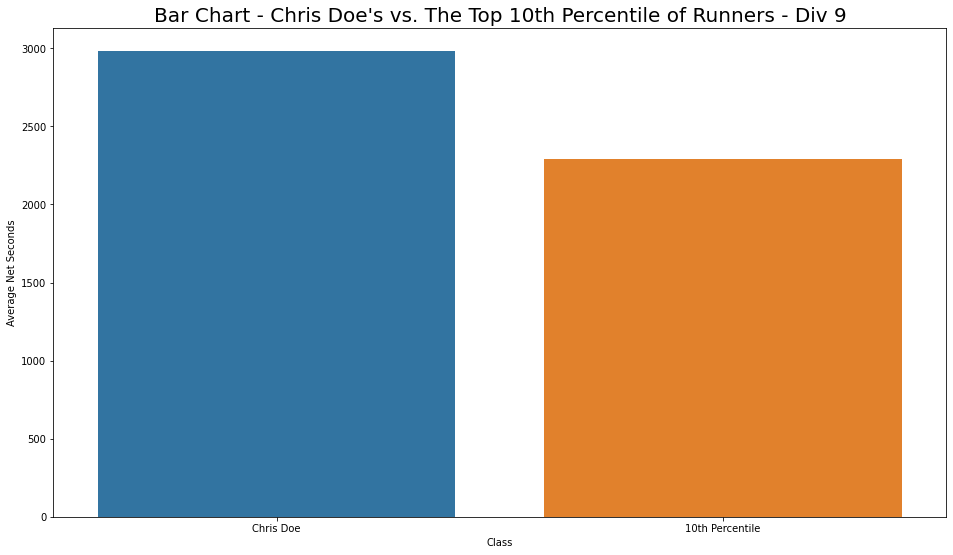

In [87]:
plt.figure(figsize=(16, 9))
plt.title("Bar Chart - Chris Doe's vs. The Top 10th Percentile of Runners - Div 9", fontsize=20)
p = sns.barplot(
    data=pd.DataFrame(data=
        {'Class' : ['Chris Doe','10th Percentile'], 
        'Average Net Seconds' : [2983, tenth_perc_max_time_mean]}), 
    x='Class', 
    y='Average Net Seconds');

Chris Doe would need to improve his time by 484 seconds or 8 minutes to be in the top 10 percentile of runners in his division. The top 10 percentile of runners are, on average, 23.29% faster than Chris Doe when comparing the top 10 percentile's average and Chris Doe's net time.

### 3.4 Compare the race results of each division.

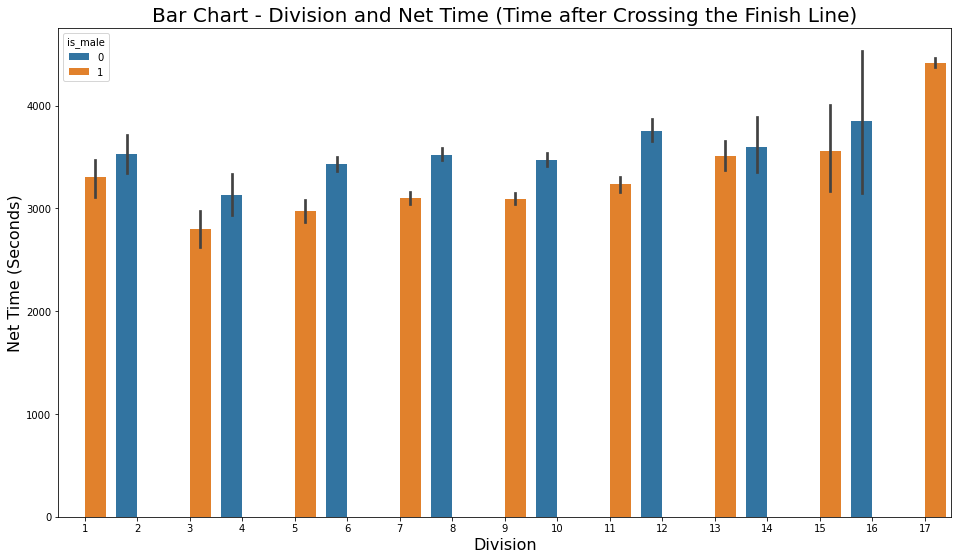

In [88]:
plt.figure(figsize=(16,9))
plt.title('Bar Chart - Division and Net Time (Time after Crossing the Finish Line)', fontsize=20)
p = sns.barplot(data=df, x='div', y='net_time_sec', hue='is_male')
p.set_xlabel('Division', fontsize=16)
p.set_ylabel('Net Time (Seconds)', fontsize=16);

Our earlier scatterplot which showed time between race start (Gun Time) and crossing start line (Net Time) with race placement demonstrated that there is a decent correlation between the clusters of runners allowed to cross the starting line with placement. However, there is also an element of speed, age, and gender involved as, with just net time, we still see the same patterns.

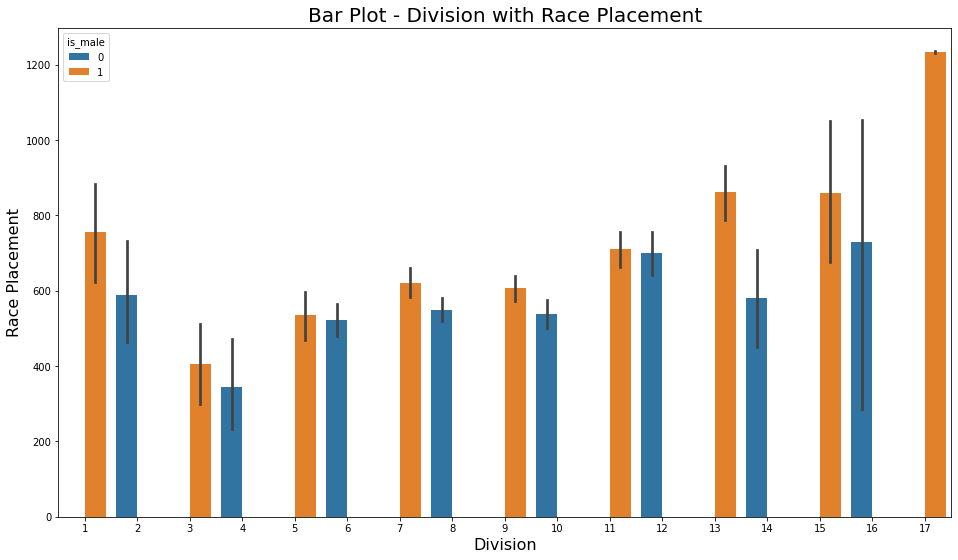

In [89]:
plt.figure(figsize=(16,9))
plt.title('Bar Plot - Division with Race Placement', fontsize=20)
p = sns.barplot(data=df, x='div', y='place', hue='is_male')
p.set_xlabel('Division', fontsize=16)
p.set_ylabel('Race Placement', fontsize=16);

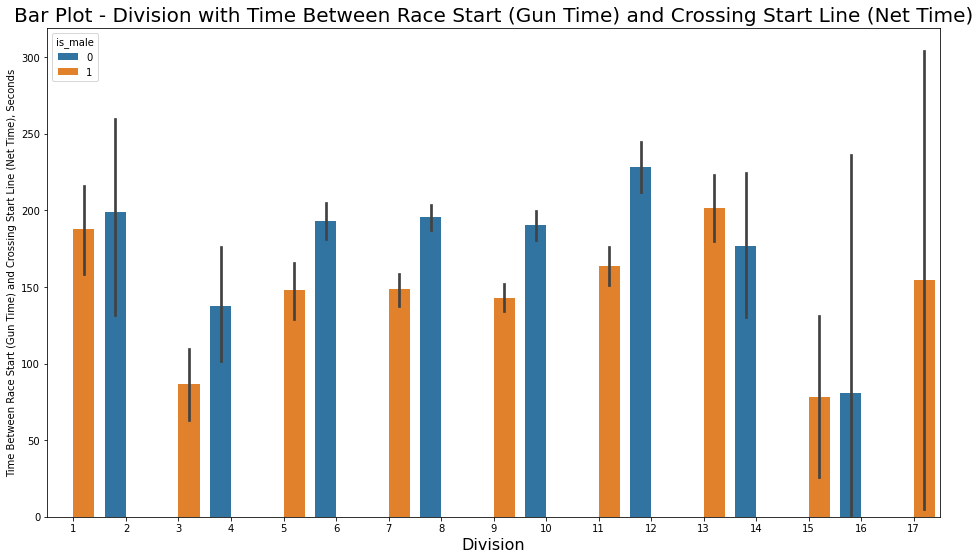

In [90]:
plt.figure(figsize=(16,9))
plt.title('Bar Plot - Division with Time Between Race Start (Gun Time) and Crossing Start Line (Net Time)', fontsize=20)
p = sns.barplot(data=df, x='div', y='pre_start_line_time', hue='is_male')
p.set_xlabel('Division', fontsize=16)
p.set_ylabel('Time Between Race Start (Gun Time) and Crossing Start Line (Net Time), Seconds');

Division 3, composed of teenage boys aged 15-19, was the fastest division. From there, we see an incremental increase towards the right side of the bar chart as age groups and divisions increase, with age groups and gender splitting the data into separate increments. Division 4, composed of teenage girls aged 15-19 was the division that, overall, had the best rankings. Division 12 spent the most amount of time behind the starting line, but there isn't a clear pattern in the chart that demonstrates a correlation between division and group order when being allowed to start the race. Instead, it is more likely that bib number is the feature that has a definitive effect on the order of runners to cross the starting line.